In [691]:
import pandas as pd
import re
import numpy as np
import tensorflow as tf
import numpy as np
import operator
import os
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.spatial.distance import cdist
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [1911]:
pip install --upgrade tensorflow==1.15.0

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==1.15.0 (from versions: 2.2.0rc1, 2.2.0rc2, 2.2.0rc3, 2.2.0rc4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0rc0, 2.3.0rc1, 2.3.0rc2, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0rc0, 2.4.0rc1, 2.4.0rc2, 2.4.0rc3, 2.4.0rc4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0rc0, 2.5.0rc1, 2.5.0rc2, 2.5.0rc3, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.8.0rc0, 2.8.0rc1, 2.8.0)
ERROR: No matching distribution found for tensorflow==1.15.0


In [137]:
path = r'C:\Users\Yunseok Choi\Downloads\ESG Data'
os.listdir(path)

['Industry.csv', 'RE100.csv', 'RUSSELL 3000 + @.csv', 'RUSSELL 3000 DATA.csv']

In [899]:
data1= pd.read_csv(path + '\RUSSELL 3000 DATA.csv')
data2= pd.read_csv(path + '\RUSSELL 3000 + @.csv')
data1.dropna(subset = ['PART'], inplace = True)
data2.dropna(subset = ['PART'], inplace = True)
rs100 = pd.read_csv(path + '\Industry.csv')
re100 = pd.read_csv(path + '\RE100.csv')

In [915]:
def preprocess(item):
    global data1
    global data2
    global rs100
    temp = pd.concat([data1[data1['Unnamed: 0'] == item].copy(),
                  data2[data2['Unnamed: 0'] == item].copy()])
    temp.reset_index(inplace = True, drop = True)
    temp = pd.DataFrame(np.insert(temp.values,0,values=[item, 'YEAR', 2016, 2017, 2018, 2019, 2020, 2021, 2022],axis=0))
    temp = temp.transpose()
    temp.reset_index(inplace = True, drop = True)
    temp.drop([0], inplace = True)
    temp.columns = list(temp.iloc[0].values)
    temp.reset_index(inplace = True, drop = True)
    temp.drop([0], inplace = True)
    temp['INDUSTRY'] = rs100[rs100['COMPANY'] == item.replace('QUITY','quity')]['GICS Sector'].values[0]
    temp['COMPANY'] = item
    return temp

In [916]:
rus1000_list = [x.upper() for x in rs100['COMPANY'].values]
df = pd.DataFrame()
for item in set(data1['Unnamed: 0']):
    if item.upper() in rus1000_list:
        df = pd.concat([df, preprocess(item)])
df.shape

(7539, 24)

In [917]:
#df.drop(['IS_INT_EXPENSES'], axis = 1, inplace = True)
for column in df.columns:
    print(column, ' / ', df.dropna(subset = [column]).shape)

YEAR  /  (7539, 24)
ROBECOSAM_TOTAL_STBLY_RANK  /  (4159, 24)
ROBECOSAM_ENV_DIMENSION_RANK  /  (4150, 24)
ROBECOSAM_SOCIAL_DIMENSION_RANK  /  (4150, 24)
ROBECOSAM_ECON_DIMENSION_RANK  /  (4150, 24)
TOTAL_GHG_EMISSIONS  /  (2763, 24)
TOT_GHG_CO2_EM_INTENS_PER_SALES  /  (2798, 24)
TOBIN_Q_RATIO  /  (5509, 24)
IS_INT_EXPENSE  /  (5438, 24)
INT_EXP_TO_NET_SALES  /  (5044, 24)
IS_INT_EXPENSES  /  (526, 24)
FNCL_LVRG  /  (6199, 24)
PROF_MARGIN  /  (6578, 24)
SALES_REV_TURN  /  (6600, 24)
RETURN_ON_ASSET  /  (6424, 24)
TOT_MKT_VAL  /  (6208, 24)
SALES_GROWTH  /  (6452, 24)
RETURN_COM_EQY  /  (6089, 24)
WACC_COST_DEBT  /  (6534, 24)
WACC_COST_EQUITY  /  (6534, 24)
WACC  /  (6534, 24)
BS_TOT_ASSET  /  (6556, 24)
INDUSTRY  /  (7539, 24)
COMPANY  /  (7539, 24)


In [918]:
year_list = list(set(df['YEAR'].values))
year_list

[2016, 2017, 2018, 2019, 2020, 2021, 2022]

In [919]:
column_list = df.columns
column_list

Index(['YEAR', 'ROBECOSAM_TOTAL_STBLY_RANK', 'ROBECOSAM_ENV_DIMENSION_RANK',
       'ROBECOSAM_SOCIAL_DIMENSION_RANK', 'ROBECOSAM_ECON_DIMENSION_RANK',
       'TOTAL_GHG_EMISSIONS', 'TOT_GHG_CO2_EM_INTENS_PER_SALES',
       'TOBIN_Q_RATIO', 'IS_INT_EXPENSE', 'INT_EXP_TO_NET_SALES',
       'IS_INT_EXPENSES', 'FNCL_LVRG', 'PROF_MARGIN', 'SALES_REV_TURN',
       'RETURN_ON_ASSET', 'TOT_MKT_VAL', 'SALES_GROWTH', 'RETURN_COM_EQY',
       'WACC_COST_DEBT', 'WACC_COST_EQUITY', 'WACC', 'BS_TOT_ASSET',
       'INDUSTRY', 'COMPANY'],
      dtype='object')

In [920]:
for year in year_list:
    print(year, '/', df[(df['TOTAL_GHG_EMISSIONS'].notna()) & (df['YEAR'] == year)].shape)

2016 / (333, 24)
2017 / (401, 24)
2018 / (460, 24)
2019 / (544, 24)
2020 / (588, 24)
2021 / (437, 24)
2022 / (0, 24)


In [ ]:
df.columns

In [921]:
df_reg = pd.DataFrame()
for column in column_list[1:-2]:
    na_included = [np.nan if (len(re.findall(r'[0-9.]+', str(item))) != 1) else float(item) for item in df[column].values]
    na_excluded = [x for x in na_included if np.isnan(float(x)) != True]
    df_reg[column] = [x/np.mean(na_excluded) if (np.isnan(float(x)) != True) else np.nan for x in na_included]
for column in list(column_list[-2:]) + [column_list[0]]:
    df_reg[column] = df[column].values
df_reg.reset_index(inplace = True, drop = True)
column_list = df_reg.columns

In [922]:
df_reg

,ROBECOSAM_TOTAL_STBLY_RANK,ROBECOSAM_ENV_DIMENSION_RANK,ROBECOSAM_SOCIAL_DIMENSION_RANK,ROBECOSAM_ECON_DIMENSION_RANK,TOTAL_GHG_EMISSIONS,TOT_GHG_CO2_EM_INTENS_PER_SALES,TOBIN_Q_RATIO,IS_INT_EXPENSE,INT_EXP_TO_NET_SALES,IS_INT_EXPENSES,...,TOT_MKT_VAL,SALES_GROWTH,RETURN_COM_EQY,WACC_COST_DEBT,WACC_COST_EQUITY,WACC,BS_TOT_ASSET,INDUSTRY,COMPANY,YEAR
0,NaN,NaN,NaN,NaN,NaN,NaN,0.713740,0.095664,0.414416,NaN,...,0.073746,-0.033621,0.830028,0.755575,1.129534,1.197456,0.058747,Industrials,WWD US Equity,2016
1,NaN,NaN,NaN,NaN,NaN,NaN,0.795046,0.098001,0.409250,NaN,...,0.085657,0.168229,0.842564,1.207465,1.139061,1.274468,0.061298,Industrials,WWD US Equity,2017
2,NaN,NaN,NaN,NaN,NaN,NaN,0.682843,0.113507,0.427693,NaN,...,0.101880,0.487298,0.673179,1.656321,0.993788,1.061119,0.084277,Industrials,WWD US Equity,2018
3,NaN,NaN,NaN,NaN,NaN,NaN,0.803889,0.157205,0.475068,NaN,...,0.126005,1.111539,0.863395,0.891788,0.922981,1.006940,0.087965,Industrials,WWD US Equity,2019
4,0.073211,0.000000,0.161986,0.421335,NaN,NaN,0.634655,0.127944,0.449298,NaN,...,0.098336,-0.627883,0.701801,0.349683,1.297789,1.378673,0.086782,Industrials,WWD US Equity,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7534,0.634493,0.798719,0.809930,0.231734,0.138136,0.495399,0.535771,1.250465,3.185824,NaN,...,0.464251,0.111294,0.547309,1.182853,0.765702,0.720743,0.471847,Utilities,AWK US Equity,2018
7535,1.268986,0.677701,1.592862,1.306138,0.146000,0.498944,0.612028,1.364794,3.313359,NaN,...,0.569432,0.222458,0.562625,0.871317,0.572194,0.558343,0.504285,Utilities,AWK US Equity,2019
7536,1.244583,1.040755,1.835841,1.537872,0.136428,0.445615,0.666948,1.411240,3.274626,NaN,...,0.673230,0.208238,0.612209,0.378534,0.868278,0.791221,0.550618,Utilities,AWK US Equity,2020
7537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.411240,3.274626,NaN,...,0.673230,0.208238,0.612209,0.972658,0.995747,0.963128,0.550618,Utilities,AWK US Equity,2021


In [923]:
for year in year_list:
    print(year, ' ', df_reg[(df_reg['TOTAL_GHG_EMISSIONS'].notna()) & (df_reg['YEAR'] == year)].shape)

2016   (333, 24)
2017   (401, 24)
2018   (460, 24)
2019   (544, 24)
2020   (588, 24)
2021   (437, 24)
2022   (0, 24)


# t-SNE


In [926]:
df_all = df_reg[(df_reg['TOTAL_GHG_EMISSIONS'].notna())].fillna(0)
df_all.reset_index(inplace = True, drop = True)
x_all = df_all[column_list[:-3]].values

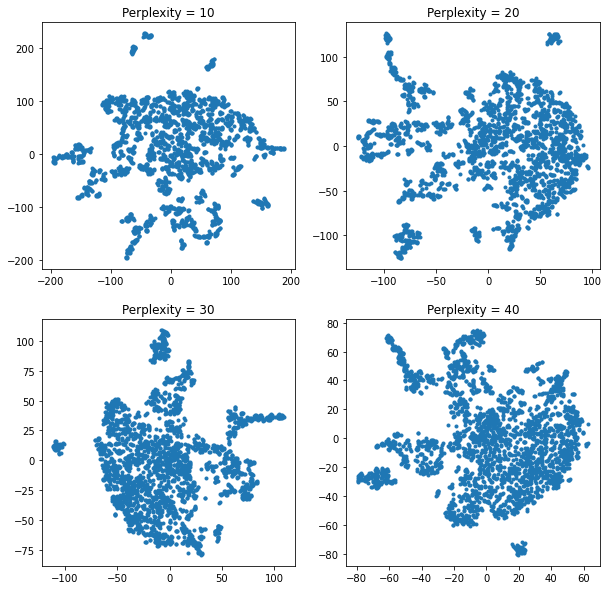

In [927]:
#차원 감축을 위한 t-sne 변수 결정. l_rate, iteration, perplexity을 다양하게 바꿔가며 output 관찰
perplexity = [10,20,30,40]
#l_rate = 1000
#iteration = 300
l_rate = 2000
iteration = 8000
data = x_all

plt.figure(figsize=(10,10))
for i in range(len(perplexity)):    
    plt.subplot(2,2,i+1)
    if i == 0:
        plt.subplots_adjust(hspace = 0.2, wspace = 0.2)
    tsne = TSNE(n_components = 2, learning_rate = l_rate, 
                perplexity = perplexity[i], n_iter = iteration)
    X = tsne.fit_transform(data)
    plt.plot([x[0] for x in X], [x[1] for x in X], '.')
    plt.title("Perplexity = {}".format(perplexity[i]))

df_all['TSNE'] = list(tsne.fit_transform(x_all))

# Clustering using Kmeans

### By Total Data


In [1313]:
perplexity = 30
l_rate = 2000
iteration = 8000

tsne = TSNE(n_components = 2, learning_rate = l_rate, 
            perplexity = perplexity, n_iter = iteration)

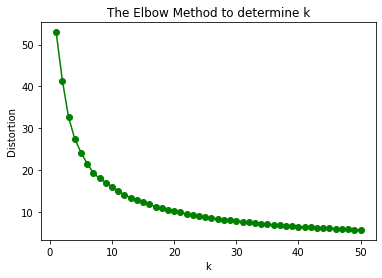

Cluster 0 has 406 companies.
Cluster 1 has 313 companies.
Cluster 2 has 326 companies.
Cluster 3 has 323 companies.
Cluster 4 has 222 companies.
Cluster 5 has 302 companies.
Cluster 6 has 192 companies.
Cluster 7 has 267 companies.
Cluster 8 has 367 companies.
Cluster 9 has 45 companies.


In [1314]:
#전체 데이터셋 클러스터 개수 결정을 위한 elbow method
k_t = 10

data = x_all
X = tsne.fit_transform(data)
df_all['TSNE'] = list(X)
distortions = []
K = range(1,51)
for k in K:
    elbow = KMeans(n_clusters = k).fit(X)
    distortions.append(sum(np.min(cdist(X, elbow.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
plt.plot(K, distortions, 'go-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method to determine k')
plt.show()
kmeans = KMeans(n_clusters = k_t).fit(X)
df_all['LABELS'] = kmeans.labels_
for i in range(k_t):
    print('Cluster {} has {} companies.'.format(i,(kmeans.labels_ == i).sum()))

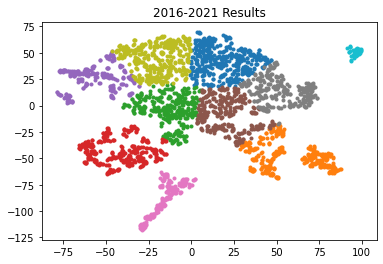

In [1315]:
#전체 데이터셋 클러스터링 결과 시각화
data = df_all
for i in range(len(set(data['LABELS']))):
    item = list(set(data['LABELS']))[i]
    data[data['LABELS'] == item]['TSNE']
    plt.plot([x[0] for x in data[data['LABELS'] == item]['TSNE'].values],[y[1] for y in data[data['LABELS'] == item]['TSNE'].values],
             '.', color = 'C{}'.format(i))
plt.title('2016-2021 Results')

plt.show()

In [1316]:
#년도별(16/17. 18/19, 20/21) 데이터 분리
df_c1 = df_all[(df_all['YEAR'] == 2016) | (df_all['YEAR'] == 2017)].reset_index(drop= True).copy()
df_c2 = df_all[(df_all['YEAR'] == 2018) | (df_all['YEAR'] == 2019)].reset_index(drop= True).copy()
df_c3 = df_all[(df_all['YEAR'] == 2020) | (df_all['YEAR'] == 2021)].reset_index(drop= True).copy()

In [1319]:
#re100 선언 변수추가를 위한 processing
declare = []
for i in range(df_c1.shape[0]):
    if df_c1.iloc[i]['COMPANY'].upper() in re100['COMPANY'].values:
        if df_c1.iloc[i]['YEAR'] >= re100[re100['COMPANY'] == df_c1.iloc[i]['COMPANY']]['RE100 Declare Year']:
            declare.append(1)
        else:
            declare.append(0)
    else:
        declare.append(0)
df_c1['RE100'] = declare
declare = []
for i in range(df_c2.shape[0]):
    if df_c2.iloc[i]['COMPANY'].upper() in re100['COMPANY'].values:
        if df_c2.iloc[i]['YEAR'] >= re100[re100['COMPANY'] == df_c2.iloc[i]['COMPANY']]['RE100 Declare Year']:
            declare.append(1)
        else:
            declare.append(0)
    else:
        declare.append(0)
df_c2['RE100'] = declare
declare = []
for i in range(df_c3.shape[0]):
    if df_c3.iloc[i]['COMPANY'].upper() in re100['COMPANY'].values:
        if df_c3.iloc[i]['YEAR'] >= re100[re100['COMPANY'] == df_c3.iloc[i]['COMPANY']]['RE100 Declare Year']:
            declare.append(1)
        else:
            declare.append(0)
    else:
        declare.append(0)
df_c3['RE100'] = declare

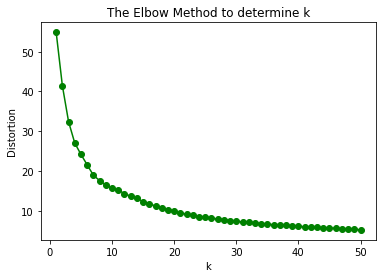

Cluster 0 has 86 companies.
Cluster 1 has 102 companies.
Cluster 2 has 42 companies.
Cluster 3 has 80 companies.
Cluster 4 has 71 companies.
Cluster 5 has 58 companies.
Cluster 6 has 99 companies.
Cluster 7 has 20 companies.
Cluster 8 has 92 companies.
Cluster 9 has 84 companies.


In [1332]:
#16/17 클러스터링을 개수 결정을 위한 elbow method
X = np.array([(x[0], x[1]) for x in list(df_c1['TSNE'].values)])
distortions = []
K = range(1,51)
for k in K:
    elbow = KMeans(n_clusters = k).fit(X)
    distortions.append(sum(np.min(cdist(X, elbow.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
plt.plot(K, distortions, 'go-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method to determine k')
plt.show()
kmeans = KMeans(n_clusters = k_t).fit(X)
df_c1['CLUSTER LABELS'] = kmeans.labels_
for i in range(k_t):
    print('Cluster {} has {} companies.'.format(i,(kmeans.labels_ == i).sum()))

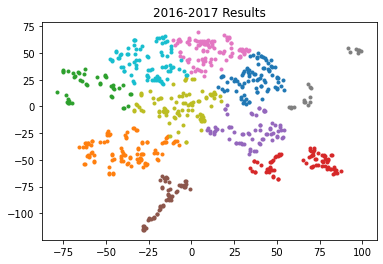

In [1333]:
#16/17 클러스터링 시각화
data = df_c1
for i in range(len(set(data['CLUSTER LABELS']))):
    item = list(set(data['CLUSTER LABELS']))[i]
    data[data['CLUSTER LABELS'] == item]['TSNE']
    plt.plot([x[0] for x in data[data['CLUSTER LABELS'] == item]['TSNE'].values],[y[1] for y in data[data['CLUSTER LABELS'] == item]['TSNE'].values],
             '.', color = 'C{}'.format(i))
plt.title('2016-2017 Results')
plt.show()

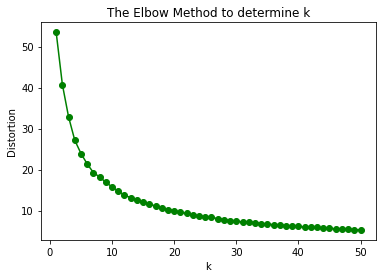

Cluster 0 has 111 companies.
Cluster 1 has 81 companies.
Cluster 2 has 110 companies.
Cluster 3 has 175 companies.
Cluster 4 has 51 companies.
Cluster 5 has 142 companies.
Cluster 6 has 67 companies.
Cluster 7 has 18 companies.
Cluster 8 has 151 companies.
Cluster 9 has 98 companies.


In [1324]:
#20/21 클러스터링을 개수 결정을 위한 elbow method
X = np.array([(x[0], x[1]) for x in list(df_c2['TSNE'].values)])
distortions = []
K = range(1,51)
for k in K:
    elbow = KMeans(n_clusters = k).fit(X)
    distortions.append(sum(np.min(cdist(X, elbow.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
plt.plot(K, distortions, 'go-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method to determine k')
plt.show()
kmeans = KMeans(n_clusters = k_t).fit(X)
df_c2['CLUSTER LABELS'] = kmeans.labels_
for i in range(k_t):
    print('Cluster {} has {} companies.'.format(i,(kmeans.labels_ == i).sum()))

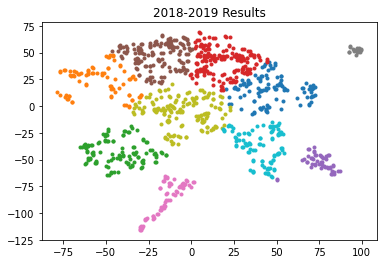

In [1325]:
#18/19 클러스터링 시각화
data = df_c2
for i in range(len(set(data['CLUSTER LABELS']))):
    item = list(set(data['CLUSTER LABELS']))[i]
    data[data['CLUSTER LABELS'] == item]['TSNE']
    plt.plot([x[0] for x in data[data['CLUSTER LABELS'] == item]['TSNE'].values],[y[1] for y in data[data['CLUSTER LABELS'] == item]['TSNE'].values],
             '.', color = 'C{}'.format(i))
plt.title('2018-2019 Results')
plt.show()

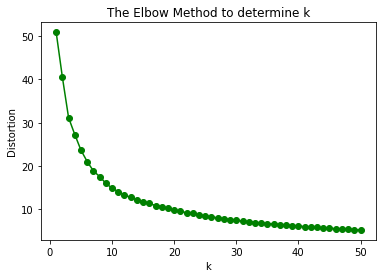

Cluster 0 has 136 companies.
Cluster 1 has 67 companies.
Cluster 2 has 106 companies.
Cluster 3 has 160 companies.
Cluster 4 has 90 companies.
Cluster 5 has 95 companies.
Cluster 6 has 119 companies.
Cluster 7 has 123 companies.
Cluster 8 has 20 companies.
Cluster 9 has 109 companies.


In [1326]:
#20/21 클러스터링을 개수 결정을 위한 elbow method
X = np.array([(x[0], x[1]) for x in list(df_c3['TSNE'].values)])
distortions = []
K = range(1,51)
for k in K:
    elbow = KMeans(n_clusters = k).fit(X)
    distortions.append(sum(np.min(cdist(X, elbow.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
plt.plot(K, distortions, 'go-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method to determine k')
plt.show()
kmeans = KMeans(n_clusters = k_t).fit(X)
df_c3['CLUSTER LABELS'] = kmeans.labels_
for i in range(k_t):
    print('Cluster {} has {} companies.'.format(i,(kmeans.labels_ == i).sum()))

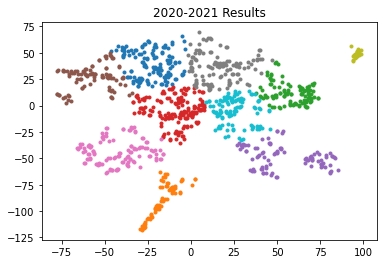

In [1327]:
#20/21 클러스터링 시각화
data = df_c3
for i in range(len(set(data['CLUSTER LABELS']))):
    item = list(set(data['CLUSTER LABELS']))[i]
    data[data['CLUSTER LABELS'] == item]['TSNE']
    plt.plot([x[0] for x in data[data['CLUSTER LABELS'] == item]['TSNE'].values],[y[1] for y in data[data['CLUSTER LABELS'] == item]['TSNE'].values],
             '.', color = 'C{}'.format(i))
plt.title('2020-2021 Results')
plt.show()

In [1513]:
#현재 데이터 저장
df_c1.to_csv(path+('\df_c1.csv'))
df_c2.to_csv(path+('\df_c2.csv'))
df_c3.to_csv(path+('\df_c3.csv'))
df_all.to_csv(path+('\df_all.csv'))

2016~2017 data


In [1334]:
#16/17 수익률 기준 top5 클러스터 각 클러스터별 회귀분석.
data = df_c1.copy()
company_list = []
for item in data['COMPANY'].values:
    if item not in company_list:
        company_list.append(item)
    else:
        pass
#company_list
avg_mkvalt = {}
n_mkvalt = {}

for company in company_list:
    if data[data['COMPANY']==company].shape[0] == 2:
        k = data[data['COMPANY']==company]['CLUSTER LABELS'].values[-1]
        mkvalt0 = data[(data['COMPANY']==company) & (data['YEAR']==2016)]['TOT_MKT_VAL'].values[0]
        mkvalt1 = data[(data['COMPANY']==company) & (data['YEAR']==2017)]['TOT_MKT_VAL'].values[0]
        if mkvalt0 != 0:
            if k not in avg_mkvalt.keys():
                avg_mkvalt[k] = ((mkvalt1-mkvalt0)/mkvalt0)
                n_mkvalt[k] = 1
            else:
                avg_mkvalt[k] += ((mkvalt1-mkvalt0)/mkvalt0)
                n_mkvalt[k] += 1
rank = {}
for key in sorted(avg_mkvalt.keys()):
    avg = (avg_mkvalt[key]/n_mkvalt[key])
    rank[key] = avg
    #print('Cluster {} has average mkvalt % change of {}'.format(key,avg))
print(sorted(rank.items(), key=operator.itemgetter(1), reverse = True))
top5 = [x[0] for x in sorted(rank.items(), key=operator.itemgetter(1), reverse = True)[:5]]
industry_list = list(set(data['INDUSTRY'].values))
for industry in industry_list:
    data[str(industry).upper()] = list(((data['INDUSTRY'] == industry)*1).values)
data['CONSTANT'] = 1
columns = data.columns
iv = list(columns[1:15])+list(columns[16:20])+[columns[26]] + list(columns[-(len(industry_list)):])
dv = columns[15]
df_data = []
for k in top5:
    temp = []
    X = data[(data['CLUSTER LABELS']==k)&(data['YEAR']==2016)][iv].values
    Y = data[(data['CLUSTER LABELS']==k)&(data['YEAR']==2016)][dv].values
    lr = LinearRegression()
    lr.fit(X, Y)
    temp = list(round(x*100,2) for x in lr.coef_)
    temp.append(round(lr.score(X,Y),2))
    df_data.append(temp)
pd.DataFrame(np.array(df_data).transpose(), index = iv+['R^2'], columns = top5)

[(9, 0.42262125694547453), (0, 0.32131525096964064), (6, 0.2539899611313066), (4, 0.1694273669682586), (2, 0.1367570133919449), (1, 0.12986980996248207), (8, 0.12257357919783402), (5, 0.05960547145113061), (3, 0.05746217432961748), (7, 0.014152135847142611)]


,9,0,6,4,2
ROBECOSAM_ENV_DIMENSION_RANK,41.17,-358.82,32.15,27.00,-55.84
ROBECOSAM_SOCIAL_DIMENSION_RANK,25.81,202.64,-9.30,-42.68,37.24
ROBECOSAM_ECON_DIMENSION_RANK,-98.69,94.90,-56.48,14.96,55.42
TOTAL_GHG_EMISSIONS,1.39,102.60,111.84,-18.19,-18.31
TOT_GHG_CO2_EM_INTENS_PER_SALES,-104.59,-72.80,-64.94,43.01,-10.20
TOBIN_Q_RATIO,11.38,-21.47,-17.50,788.17,-107.44
IS_INT_EXPENSE,55.19,129.54,-75.17,11.71,-31.61
INT_EXP_TO_NET_SALES,-9.07,-111.93,34.83,11.07,-8.67
IS_INT_EXPENSES,-0.00,-0.00,-1785.47,-0.00,0.00
FNCL_LVRG,98.97,-12.07,-78.26,-125.79,0.64


In [1497]:
#연도별 '상' 그룸 회귀분석을 위한 변수선언
high_x = []
high_y = []

In [1498]:
#16/17 클러스터 수익률 별 3:4:3 비율로 상 중 하 나눈 뒤 리그레션
data = df_c1.copy()
company_list = []
for item in data['COMPANY'].values:
    if item not in company_list:
        company_list.append(item)
    else:
        pass
#company_list
avg_mkvalt = {}
n_mkvalt = {}

for company in company_list:
    if data[data['COMPANY']==company].shape[0] == 2:
        k = data[data['COMPANY']==company]['CLUSTER LABELS'].values[-1]
        mkvalt0 = data[(data['COMPANY']==company) & (data['YEAR']==2016)]['TOT_MKT_VAL'].values[0]
        mkvalt1 = data[(data['COMPANY']==company) & (data['YEAR']==2017)]['TOT_MKT_VAL'].values[0]
        if mkvalt0 != 0:
            if k not in avg_mkvalt.keys():
                avg_mkvalt[k] = ((mkvalt1-mkvalt0)/mkvalt0)
                n_mkvalt[k] = 1
            else:
                avg_mkvalt[k] += ((mkvalt1-mkvalt0)/mkvalt0)
                n_mkvalt[k] += 1
rank = {}
for key in sorted(avg_mkvalt.keys()):
    avg = (avg_mkvalt[key]/n_mkvalt[key])
    rank[key] = avg
    #print('Cluster {} has average mkvalt % change of {}'.format(key,avg))
#print(sorted(rank.items(), key=operator.itemgetter(1), reverse = True))
top = [x[0] for x in sorted(rank.items(), key=operator.itemgetter(1), reverse = True)[0:3]]
mid = [x[0] for x in sorted(rank.items(), key=operator.itemgetter(1), reverse = True)[4:8]]
low = [x[0] for x in sorted(rank.items(), key=operator.itemgetter(1), reverse = True)[8:10]]
industry_list = list(set(data['INDUSTRY'].values)) + ['INFORMATION TECHNOLOGY']
for industry in industry_list:
    data[str(industry).upper()] = list(((data['INDUSTRY'] == industry)*1).values)
data['CONSTANT'] = 1
columns = data.columns
iv = list(columns[1:15])+list(columns[16:20])+[columns[26]] + list(columns[-(len(industry_list)):])
dv = columns[15]
df_data = []
for item in [top, mid, low]:
    X = []
    Y = []
    for k in item:
        temp = []
        X += [list(x) for x in data[(data['CLUSTER LABELS']==k)&(data['YEAR']==2016)][iv].values]
        Y += list(data[(data['CLUSTER LABELS']==k)&(data['YEAR']==2016)][dv].values)
        if item == top:
            high_x += [list(x) for x in data[(data['CLUSTER LABELS']==k)&(data['YEAR']==2016)][iv].values]
            high_y += list(data[(data['CLUSTER LABELS']==k)&(data['YEAR']==2016)][dv].values)
    lr = LinearRegression()
    lr.fit(X, Y)
    temp = list(round(x*100,2) for x in lr.coef_)
    temp.append(round(lr.score(X,Y),2))
    df_data.append(temp)
pd.DataFrame(np.array(df_data).transpose(), index = iv+['R^2'], columns = ['Top','Mid','Low'])

,Top,Mid,Low
ROBECOSAM_ENV_DIMENSION_RANK,-106.12,45.47,-57.89
ROBECOSAM_SOCIAL_DIMENSION_RANK,34.00,-31.27,-50.32
ROBECOSAM_ECON_DIMENSION_RANK,65.85,-16.32,104.46
TOTAL_GHG_EMISSIONS,100.93,0.20,2.31
TOT_GHG_CO2_EM_INTENS_PER_SALES,-84.42,-10.90,-3.88
TOBIN_Q_RATIO,-5.82,9.89,-28.03
IS_INT_EXPENSE,-56.48,-4.86,-2.62
INT_EXP_TO_NET_SALES,28.09,19.57,1.40
IS_INT_EXPENSES,-993.77,-3.85,-0.00
FNCL_LVRG,-60.54,0.30,-30.68


2018~2019 data

In [1336]:
#18/19 수익률 기준 top5 클러스터 각 클러스터별 회귀분석.
data = df_c2.copy()
company_list = []
for item in data['COMPANY'].values:
    if item not in company_list:
        company_list.append(item)
    else:
        pass
#company_list
avg_mkvalt = {}
n_mkvalt = {}

for company in company_list:
    if data[data['COMPANY']==company].shape[0] == 2:
        k = data[data['COMPANY']==company]['CLUSTER LABELS'].values[-1]
        mkvalt0 = data[(data['COMPANY']==company) & (data['YEAR']==2018)]['TOT_MKT_VAL'].values[0]
        mkvalt1 = data[(data['COMPANY']==company) & (data['YEAR']==2019)]['TOT_MKT_VAL'].values[0]
        if mkvalt0 != 0:
            if k not in avg_mkvalt.keys():
                avg_mkvalt[k] = ((mkvalt1-mkvalt0)/mkvalt0)
                n_mkvalt[k] = 1
            else:
                avg_mkvalt[k] += ((mkvalt1-mkvalt0)/mkvalt0)
                n_mkvalt[k] += 1
rank = {}
for key in sorted(avg_mkvalt.keys()):
    avg = (avg_mkvalt[key]/n_mkvalt[key])
    rank[key] = avg
    #print('Cluster {} has average mkvalt % change of {}'.format(key,avg))
print(sorted(rank.items(), key=operator.itemgetter(1), reverse = True))
top5 = [x[0] for x in sorted(rank.items(), key=operator.itemgetter(1), reverse = True)[:5]]
industry_list = list(set(data['INDUSTRY'].values))
for industry in industry_list:
    data[str(industry).upper()] = list(((data['INDUSTRY'] == industry)*1).values)
data['CONSTANT'] = 1
columns = data.columns
iv = list(columns[1:15])+list(columns[16:20])+[columns[26]] + list(columns[-(len(industry_list)):])
dv = columns[15]
df_data = []
for k in top5:
    temp = []
    X = data[(data['CLUSTER LABELS']==k)&(data['YEAR']==2018)][iv].values
    Y = data[(data['CLUSTER LABELS']==k)&(data['YEAR']==2018)][dv].values
    lr = LinearRegression()
    lr.fit(X, Y)
    temp = list(round(x*100,2) for x in lr.coef_)
    temp.append(round(lr.score(X,Y),2))
    df_data.append(temp)
pd.DataFrame(np.array(df_data).transpose(), index = iv+['R^2'], columns = top5)

[(5, 0.2693235379324573), (3, 0.2503956661730289), (1, 0.19741602621032808), (0, 0.1945997874893226), (8, 0.17928298254625358), (4, 0.13261349637360742), (2, 0.13092393372828928), (9, 0.10586728217811253), (6, 0.07945016316141051)]


,5,3,1,0,8
ROBECOSAM_ENV_DIMENSION_RANK,-15.43,16.50,-15.76,15.43,36.75
ROBECOSAM_SOCIAL_DIMENSION_RANK,-16.71,51.63,-9.62,6.13,-10.32
ROBECOSAM_ECON_DIMENSION_RANK,14.96,23.39,19.33,-6.17,-17.58
TOTAL_GHG_EMISSIONS,167.91,-54.37,18.69,110.54,-99.95
TOT_GHG_CO2_EM_INTENS_PER_SALES,-110.69,-31.85,-69.82,-69.39,10.36
TOBIN_Q_RATIO,30.30,-182.20,-0.61,78.76,66.58
IS_INT_EXPENSE,22.27,-245.14,-14.67,-50.72,13.41
INT_EXP_TO_NET_SALES,32.34,253.77,-3.98,-8.78,-10.65
IS_INT_EXPENSES,-8492.64,-0.00,0.00,-0.00,11445.70
FNCL_LVRG,46.72,4.04,0.28,51.37,14.88


In [1499]:
#18/19 클러스터 수익률 별 3:4:3 비율로 상 중 하 나눈 뒤 리그레션
data = df_c2.copy()
company_list = []
for item in data['COMPANY'].values:
    if item not in company_list:
        company_list.append(item)
    else:
        pass
#company_list
avg_mkvalt = {}
n_mkvalt = {}

for company in company_list:
    if data[data['COMPANY']==company].shape[0] == 2:
        k = data[data['COMPANY']==company]['CLUSTER LABELS'].values[-1]
        mkvalt0 = data[(data['COMPANY']==company) & (data['YEAR']==2018)]['TOT_MKT_VAL'].values[0]
        mkvalt1 = data[(data['COMPANY']==company) & (data['YEAR']==2019)]['TOT_MKT_VAL'].values[0]
        if mkvalt0 != 0:
            if k not in avg_mkvalt.keys():
                avg_mkvalt[k] = ((mkvalt1-mkvalt0)/mkvalt0)
                n_mkvalt[k] = 1
            else:
                avg_mkvalt[k] += ((mkvalt1-mkvalt0)/mkvalt0)
                n_mkvalt[k] += 1
rank = {}
for key in sorted(avg_mkvalt.keys()):
    avg = (avg_mkvalt[key]/n_mkvalt[key])
    rank[key] = avg
    #print('Cluster {} has average mkvalt % change of {}'.format(key,avg))
#print(sorted(rank.items(), key=operator.itemgetter(1), reverse = True))
top = [x[0] for x in sorted(rank.items(), key=operator.itemgetter(1), reverse = True)[0:3]]
mid = [x[0] for x in sorted(rank.items(), key=operator.itemgetter(1), reverse = True)[4:8]]
low = [x[0] for x in sorted(rank.items(), key=operator.itemgetter(1), reverse = True)[8:10]]
industry_list = list(set(data['INDUSTRY'].values))
for industry in industry_list:
    data[str(industry).upper()] = list(((data['INDUSTRY'] == industry)*1).values)
data['CONSTANT'] = 1
columns = data.columns
iv = list(columns[1:15])+list(columns[16:20])+[columns[26]] + list(columns[-(len(industry_list)):])
dv = columns[15]
df_data = []
for item in [top, mid, low]:
    X = []
    Y = []
    for k in item:
        temp = []
        X += [list(x) for x in data[(data['CLUSTER LABELS']==k)&(data['YEAR']==2018)][iv].values]
        Y += list(data[(data['CLUSTER LABELS']==k)&(data['YEAR']==2018)][dv].values)
        if item == top:
            high_x += [list(x) for x in data[(data['CLUSTER LABELS']==k)&(data['YEAR']==2018)][iv].values]
            high_y += list(data[(data['CLUSTER LABELS']==k)&(data['YEAR']==2018)][dv].values)
    lr = LinearRegression()
    lr.fit(X, Y)
    temp = list(round(x*100,2) for x in lr.coef_)
    temp.append(round(lr.score(X,Y),2))
    df_data.append(temp)
pd.DataFrame(np.array(df_data).transpose(), index = iv+['R^2'], columns = ['Top','Mid','Low'])


,Top,Mid,Low
ROBECOSAM_ENV_DIMENSION_RANK,-12.90,16.03,3.80
ROBECOSAM_SOCIAL_DIMENSION_RANK,-21.67,9.39,13.00
ROBECOSAM_ECON_DIMENSION_RANK,47.98,-42.03,-7.37
TOTAL_GHG_EMISSIONS,-34.53,-1.26,-297.66
TOT_GHG_CO2_EM_INTENS_PER_SALES,93.91,5.05,-500.55
TOBIN_Q_RATIO,-33.78,53.08,454.41
IS_INT_EXPENSE,-48.60,0.29,25.55
INT_EXP_TO_NET_SALES,177.82,-10.01,-146.05
IS_INT_EXPENSES,29857.93,9944.61,-0.40
FNCL_LVRG,-3.54,-12.73,-56.72


2020~2021 data

In [1490]:
#20/21 수익률 기준 top5 클러스터 각 클러스터별 회귀분석.
data = df_c3.copy()
company_list = []
for item in data['COMPANY'].values:
    if item not in company_list:
        company_list.append(item)
    else:
        pass
#company_list
avg_mkvalt = {}
n_mkvalt = {}

for company in company_list:
    if data[data['COMPANY']==company].shape[0] == 2:
        k = data[data['COMPANY']==company]['CLUSTER LABELS'].values[-1]
        mkvalt0 = data[(data['COMPANY']==company) & (data['YEAR']==2020)]['TOT_MKT_VAL'].values[0]
        mkvalt1 = data[(data['COMPANY']==company) & (data['YEAR']==2021)]['TOT_MKT_VAL'].values[0]
        if mkvalt0 != 0:
            if k not in avg_mkvalt.keys():
                avg_mkvalt[k] = ((mkvalt1-mkvalt0)/mkvalt0)
                n_mkvalt[k] = 1
            else:
                avg_mkvalt[k] += ((mkvalt1-mkvalt0)/mkvalt0)
                n_mkvalt[k] += 1
rank = {}
for key in sorted(avg_mkvalt.keys()):
    avg = (avg_mkvalt[key]/n_mkvalt[key])
    rank[key] = avg
    #print('Cluster {} has average mkvalt % change of {}'.format(key,avg))
print(sorted(rank.items(), key=operator.itemgetter(1), reverse = True))
top5 = [x[0] for x in sorted(rank.items(), key=operator.itemgetter(1), reverse = True)[:5]]
industry_list = list(set(data['INDUSTRY'].values))
for industry in industry_list:
    data[str(industry).upper()] = list(((data['INDUSTRY'] == industry)*1).values)
data['CONSTANT'] = 1
columns = data.columns
iv = list(columns[1:15])+list(columns[16:20])+[columns[26]] + list(columns[-(len(industry_list)):])
dv = columns[15]
df_data = []
for k in top5:
    temp = []
    X = data[(data['CLUSTER LABELS']==k)&(data['YEAR']==2020)][iv].values
    Y = data[(data['CLUSTER LABELS']==k)&(data['YEAR']==2020)][dv].values
    lr = LinearRegression()
    lr.fit(X, Y)
    temp = list(round(x*100,2) for x in lr.coef_)
    temp.append(round(lr.score(X,Y),2))
    df_data.append(temp)
pd.DataFrame(np.array(df_data).transpose(), index = iv+['R^2'], columns = top5)

[(7, 0.3359154751200956), (0, 0.31747921548248137), (2, 0.3069052592761177), (5, 0.29593760735577257), (3, 0.21409596994904614), (9, 0.2113594405473112), (6, 0.15179995607337846), (4, 0.07793542179270474), (1, 0.07733059739462693)]


,7,0,2,5,3
ROBECOSAM_ENV_DIMENSION_RANK,-24.83,30.94,16.70,63.59,-20.71
ROBECOSAM_SOCIAL_DIMENSION_RANK,93.22,-15.54,-73.61,-42.37,-3.55
ROBECOSAM_ECON_DIMENSION_RANK,-41.11,69.69,1.28,-9.74,51.86
TOTAL_GHG_EMISSIONS,260.69,509.52,-13.56,45.93,17.70
TOT_GHG_CO2_EM_INTENS_PER_SALES,-137.66,-362.96,-24.65,-144.41,-7.03
TOBIN_Q_RATIO,-29.21,58.63,66.96,3.80,3.11
IS_INT_EXPENSE,15.86,32.70,-10.15,30.25,-27.91
INT_EXP_TO_NET_SALES,-7.98,-33.10,8.54,-16.79,53.78
IS_INT_EXPENSES,-830.46,-6918.16,0.00,-0.00,1314.44
FNCL_LVRG,63.33,-118.94,-35.59,-0.37,-59.54


In [1500]:
#20/21 클러스터 수익률 별 3:4:3 비율로 상 중 하 나눈 뒤 리그레션
data = df_c3.copy()
company_list = []
for item in data['COMPANY'].values:
    if item not in company_list:
        company_list.append(item)
    else:
        pass
#company_list
avg_mkvalt = {}
n_mkvalt = {}

for company in company_list:
    if data[data['COMPANY']==company].shape[0] == 2:
        k = data[data['COMPANY']==company]['CLUSTER LABELS'].values[-1]
        mkvalt0 = data[(data['COMPANY']==company) & (data['YEAR']==2020)]['TOT_MKT_VAL'].values[0]
        mkvalt1 = data[(data['COMPANY']==company) & (data['YEAR']==2021)]['TOT_MKT_VAL'].values[0]
        if mkvalt0 != 0:
            if k not in avg_mkvalt.keys():
                avg_mkvalt[k] = ((mkvalt1-mkvalt0)/mkvalt0)
                n_mkvalt[k] = 1
            else:
                avg_mkvalt[k] += ((mkvalt1-mkvalt0)/mkvalt0)
                n_mkvalt[k] += 1
rank = {}
for key in sorted(avg_mkvalt.keys()):
    avg = (avg_mkvalt[key]/n_mkvalt[key])
    rank[key] = avg
    #print('Cluster {} has average mkvalt % change of {}'.format(key,avg))
#print(sorted(rank.items(), key=operator.itemgetter(1), reverse = True))
top = [x[0] for x in sorted(rank.items(), key=operator.itemgetter(1), reverse = True)[0:3]]
mid = [x[0] for x in sorted(rank.items(), key=operator.itemgetter(1), reverse = True)[4:8]]
low = [x[0] for x in sorted(rank.items(), key=operator.itemgetter(1), reverse = True)[8:10]]
industry_list = list(set(data['INDUSTRY'].values))
for industry in industry_list:
    data[str(industry).upper()] = list(((data['INDUSTRY'] == industry)*1).values)
data['CONSTANT'] = 1
columns = data.columns
iv = list(columns[1:15])+list(columns[16:20])+[columns[26]] + list(columns[-(len(industry_list)):])
dv = columns[15]
df_data = []
for item in [top, mid, low]:
    X = []
    Y = []
    for k in item:
        temp = []
        X += [list(x) for x in data[(data['CLUSTER LABELS']==k)&(data['YEAR']==2020)][iv].values]
        Y += list(data[(data['CLUSTER LABELS']==k)&(data['YEAR']==2020)][dv].values)
        if item == top:
            high_x += [list(x) for x in data[(data['CLUSTER LABELS']==k)&(data['YEAR']==2020)][iv].values]
            high_y += list(data[(data['CLUSTER LABELS']==k)&(data['YEAR']==2020)][dv].values)
    lr = LinearRegression()
    lr.fit(X, Y)
    temp = list(round(x*100,2) for x in lr.coef_)
    temp.append(round(lr.score(X,Y),2))
    df_data.append(temp)
pd.DataFrame(np.array(df_data).transpose(), index = iv+['R^2'], columns = ['Top','Mid','Low'])

,Top,Mid,Low
ROBECOSAM_ENV_DIMENSION_RANK,9.36,-5.96,-83.87
ROBECOSAM_SOCIAL_DIMENSION_RANK,-12.32,3.99,137.80
ROBECOSAM_ECON_DIMENSION_RANK,9.77,1.75,-142.74
TOTAL_GHG_EMISSIONS,-5.51,-4.55,1001.21
TOT_GHG_CO2_EM_INTENS_PER_SALES,-27.20,7.74,2458.55
TOBIN_Q_RATIO,55.56,-19.61,192.50
IS_INT_EXPENSE,6.17,-0.85,-28.88
INT_EXP_TO_NET_SALES,0.42,-0.84,308.79
IS_INT_EXPENSES,-56.35,-2186.77,-1.17
FNCL_LVRG,13.30,1.85,3.82


In [1512]:
# 16/17,18/19,20/21 수익률 기준 '상' 그룹 모아서 리그레션
temp = []
lr = LinearRegression()
lr.fit(high_x, high_y)
temp = list(round(x*100,2) for x in lr.coef_)
temp.append(round(lr.score(X,Y),2))
pd.DataFrame(temp,index = iv+['R^2'], columns = ['16-21 Top Clusters'])

,16-21 Top Clusters
ROBECOSAM_ENV_DIMENSION_RANK,-28.98
ROBECOSAM_SOCIAL_DIMENSION_RANK,-2.95
ROBECOSAM_ECON_DIMENSION_RANK,24.80
TOTAL_GHG_EMISSIONS,-18.27
TOT_GHG_CO2_EM_INTENS_PER_SALES,-14.09
TOBIN_Q_RATIO,37.98
IS_INT_EXPENSE,0.63
INT_EXP_TO_NET_SALES,23.36
IS_INT_EXPENSES,235.24
FNCL_LVRG,-3.30


Top MKVALT increase companies

In [1340]:
data = df_c1
year0 = 2016
year1 = 2017

mkvalt = {}

for company in company_list:
    if data[data['COMPANY']==company].shape[0] == 2:
        mkvalt0 = data[(data['COMPANY']==company) & (data['YEAR']==2016)]['TOT_MKT_VAL'].values[0]
        mkvalt1 = data[(data['COMPANY']==company) & (data['YEAR']==2017)]['TOT_MKT_VAL'].values[0]
        if mkvalt0 != 0:
            mkvalt[company] = ((mkvalt1-mkvalt0)/mkvalt0)
top10 = [x[0] for x in sorted(mkvalt.items(),key=operator.itemgetter(1),reverse = True)[:int(round(len(mkvalt.keys())/10,0))]]
industry_list = list(set(data['INDUSTRY'].values))
for industry in industry_list:
    data[str(industry).upper()] = list(((data['INDUSTRY'] == industry)*1).values)
data['CONSTANT'] = 1
columns = data.columns
iv = list(columns[1:15])+list(columns[16:20])+[columns[26]] + list(columns[-(len(industry_list)):])
dv = columns[15]
df_data = []
X = []
Y = []
for company in top10:
    temp = []
    X+=[list(x) for x in (data[(data['COMPANY']==company) & (data['YEAR'] == year0)][iv].values)]
    Y+=list(data[(data['COMPANY']==company) & (data['YEAR'] == year0)][dv].values)

lr = LinearRegression()
lr.fit(X, Y)
temp = list(round(x*100,2) for x in lr.coef_)
temp.append(round(lr.score(X,Y),2))
df_data.append(temp)
pd.DataFrame(np.array(df_data).transpose(), index = iv+['R^2'], columns = ['TOP10%'])

,TOP10%
ROBECOSAM_ENV_DIMENSION_RANK,-52.13
ROBECOSAM_SOCIAL_DIMENSION_RANK,-54.40
ROBECOSAM_ECON_DIMENSION_RANK,134.66
TOTAL_GHG_EMISSIONS,-90.62
TOT_GHG_CO2_EM_INTENS_PER_SALES,40.50
TOBIN_Q_RATIO,245.21
IS_INT_EXPENSE,-42.23
INT_EXP_TO_NET_SALES,-159.01
IS_INT_EXPENSES,-0.00
FNCL_LVRG,-37.27


In [1341]:
data = df_c2
year0 = 2018
year1 = 2019

mkvalt = {}

for company in company_list:
    if data[data['COMPANY']==company].shape[0] == 2:
        mkvalt0 = data[(data['COMPANY']==company) & (data['YEAR']==2018)]['TOT_MKT_VAL'].values[0]
        mkvalt1 = data[(data['COMPANY']==company) & (data['YEAR']==2019)]['TOT_MKT_VAL'].values[0]
        if mkvalt0 != 0:
            mkvalt[company] = ((mkvalt1-mkvalt0)/mkvalt0)
top10 = [x[0] for x in sorted(mkvalt.items(),key=operator.itemgetter(1),reverse = True)[:int(round(len(mkvalt.keys())/10,0))]]
industry_list = list(set(data['INDUSTRY'].values))
for industry in industry_list:
    data[str(industry).upper()] = list(((data['INDUSTRY'] == industry)*1).values)
data['CONSTANT'] = 1
columns = data.columns
iv = list(columns[1:15])+list(columns[16:20])+[columns[26]] + list(columns[-(len(industry_list)):])

dv = columns[15]
df_data = []
X = []
Y = []
for company in top10:
    temp = []
    X+=[list(x) for x in (data[(data['COMPANY']==company) & (data['YEAR'] == year0)][iv].values)]
    Y+=list(data[(data['COMPANY']==company) & (data['YEAR'] == year0)][dv].values)

lr = LinearRegression()
lr.fit(X, Y)
temp = list(round(x*100,2) for x in lr.coef_)
temp.append(round(lr.score(X,Y),2))
df_data.append(temp)
pd.DataFrame(np.array(df_data).transpose(), index = iv+['R^2'], columns = ['TOP10%'])

,TOP10%
ROBECOSAM_ENV_DIMENSION_RANK,16.06
ROBECOSAM_SOCIAL_DIMENSION_RANK,-43.10
ROBECOSAM_ECON_DIMENSION_RANK,28.97
TOTAL_GHG_EMISSIONS,97.58
TOT_GHG_CO2_EM_INTENS_PER_SALES,-104.85
TOBIN_Q_RATIO,27.00
IS_INT_EXPENSE,9.24
INT_EXP_TO_NET_SALES,-2.12
IS_INT_EXPENSES,0.00
FNCL_LVRG,-0.98


In [1342]:
data = df_c3
year0=2020
year1=2021
mkvalt = {}

for company in company_list:
    if data[data['COMPANY']==company].shape[0] == 2:
        mkvalt0 = data[(data['COMPANY']==company) & (data['YEAR']==year0)]['TOT_MKT_VAL'].values[0]
        mkvalt1 = data[(data['COMPANY']==company) & (data['YEAR']==year1)]['TOT_MKT_VAL'].values[0]
        if mkvalt0 != 0:
            mkvalt[company] = ((mkvalt1-mkvalt0)/mkvalt0)
top10 = [x[0] for x in sorted(mkvalt.items(),key=operator.itemgetter(1),reverse = True)[:int(round(len(mkvalt.keys())/10,0))]]
industry_list = list(set(data['INDUSTRY'].values))
for industry in industry_list:
    data[str(industry).upper()] = list(((data['INDUSTRY'] == industry)*1).values)
data['CONSTANT'] = 1
columns = data.columns
iv = list(columns[1:15])+list(columns[16:20])+[columns[26]] + list(columns[-(len(industry_list)):])

dv = columns[15]
df_data = []
X = []
Y = []
for company in top10:
    temp = []
    X+=[list(x) for x in (data[(data['COMPANY']==company) & (data['YEAR'] == year0)][iv].values)]
    Y+=list(data[(data['COMPANY']==company) & (data['YEAR'] == year0)][dv].values)

lr = LinearRegression()
lr.fit(X, Y)
temp = list(round(x*100,2) for x in lr.coef_)
temp.append(round(lr.score(X,Y),2))
df_data.append(temp)
pd.DataFrame(np.array(df_data).transpose(), index = iv+['R^2'], columns = ['TOP10%'])

,TOP10%
ROBECOSAM_ENV_DIMENSION_RANK,-163.76
ROBECOSAM_SOCIAL_DIMENSION_RANK,40.75
ROBECOSAM_ECON_DIMENSION_RANK,117.31
TOTAL_GHG_EMISSIONS,-88.91
TOT_GHG_CO2_EM_INTENS_PER_SALES,-23.31
TOBIN_Q_RATIO,74.16
IS_INT_EXPENSE,-25.34
INT_EXP_TO_NET_SALES,52.80
IS_INT_EXPENSES,-0.00
FNCL_LVRG,30.39


In [1343]:
data = df_all
mkvalt = {}
year_list = [2016, 2017, 2018, 2019, 2020, 2021]

for company in company_list:
    for i in range(len(year_list)-2):
        year0 = year_list[i]
        year1 = year_list[i+1]
        if (data[(data['COMPANY']==company) & (data['YEAR']==year0)]['TOT_MKT_VAL'].shape[0] != 0) & (data[(data['COMPANY']==company) & (data['YEAR']==year1)]['TOT_MKT_VAL'].shape[0] != 0):
            mkvalt0 = data[(data['COMPANY']==company) & (data['YEAR']==year0)]['TOT_MKT_VAL'].values[0]
            mkvalt1 = data[(data['COMPANY']==company) & (data['YEAR']==year1)]['TOT_MKT_VAL'].values[0]
            if mkvalt0 != 0:
                mkvalt['{}/{}'.format(company,year0)] = ((mkvalt1-mkvalt0)/mkvalt0)
top10 = [x[0] for x in sorted(mkvalt.items(),key=operator.itemgetter(1),reverse = True)[:int(round(len(mkvalt.keys())/10,0))]]
industry_list = list(set(data['INDUSTRY'].values))
for industry in industry_list:
    data[str(industry).upper()] = list(((data['INDUSTRY'] == industry)*1).values)
data['CONSTANT'] = 1
columns = data.columns
#iv = list(columns[0:15])+list(columns[16:20])+[columns[26]] + list(columns[-(len(industry_list)):])
iv = list(columns[1:15])+list(columns[16:20])+ list(columns[-(len(industry_list)):])


dv = columns[15]
df_data = []
X = []
Y = []
for i in range(len(top10)):
    company, year = top10[i].split('/')[0],top10[i].split('/')[1]
    temp = []
    X+=[list(x) for x in (data[(data['COMPANY']==company) & (data['YEAR'] == float(year))][iv].values)]
    Y+=list((data[(data['COMPANY']==company) & (data['YEAR'] == float(year))][dv].values))

lr = LinearRegression()
lr.fit(X, Y)
temp = list(round(x*100,2) for x in lr.coef_)
temp.append(round(lr.score(X,Y),2))
df_data.append(temp)
pd.DataFrame(np.array(df_data).transpose(), index = iv+['R^2'], columns = ['TOP10%'])

,TOP10%
ROBECOSAM_ENV_DIMENSION_RANK,-43.35
ROBECOSAM_SOCIAL_DIMENSION_RANK,50.75
ROBECOSAM_ECON_DIMENSION_RANK,-23.33
TOTAL_GHG_EMISSIONS,-4.46
TOT_GHG_CO2_EM_INTENS_PER_SALES,7.51
TOBIN_Q_RATIO,49.68
IS_INT_EXPENSE,-22.28
INT_EXP_TO_NET_SALES,87.73
IS_INT_EXPENSES,-0.00
FNCL_LVRG,-8.38


In [1344]:
data = df_all
mkvalt = {}
year_list = [2016, 2017, 2018, 2019]


for company in company_list:
    for i in range(len(year_list)-2):
        year0 = year_list[i]
        year1 = year_list[i+1]
        if (data[(data['COMPANY']==company) & (data['YEAR']==year0)]['TOT_MKT_VAL'].shape[0] != 0) & (data[(data['COMPANY']==company) & (data['YEAR']==year1)]['TOT_MKT_VAL'].shape[0] != 0):
            mkvalt0 = data[(data['COMPANY']==company) & (data['YEAR']==year0)]['TOT_MKT_VAL'].values[0]
            mkvalt1 = data[(data['COMPANY']==company) & (data['YEAR']==year1)]['TOT_MKT_VAL'].values[0]
            if mkvalt0 != 0:
                mkvalt['{}/{}'.format(company,year0)] = ((mkvalt1-mkvalt0)/mkvalt0)
top10 = [x[0] for x in sorted(mkvalt.items(),key=operator.itemgetter(1),reverse = True)[:int(round(len(mkvalt.keys())/10,0))]]
industry_list = list(set(data['INDUSTRY'].values))
for industry in industry_list:
    data[str(industry).upper()] = list(((data['INDUSTRY'] == industry)*1).values)
data['CONSTANT'] = 1
columns = data.columns
iv = list(columns[1:15])+list(columns[16:20])+[columns[26]] + list(columns[-(len(industry_list)):])

dv = columns[15]
df_data = []
X = []
Y = []
for i in range(len(top10)):
    company, year = top10[i].split('/')[0],top10[i].split('/')[1]
    temp = []
    X+=[list(x) for x in (data[(data['COMPANY']==company) & (data['YEAR'] == float(year))][iv].values)]
    Y+=list((data[(data['COMPANY']==company) & (data['YEAR'] == float(year))][dv].values))

lr = LinearRegression()
lr.fit(X, Y)
temp = list(round(x*100,2) for x in lr.coef_)
temp.append(round(lr.score(X,Y),2))
df_data.append(temp)
pd.DataFrame(np.array(df_data).transpose(), index = iv+['R^2'], columns = ['TOP10%'])

,TOP10%
ROBECOSAM_ENV_DIMENSION_RANK,-67.94
ROBECOSAM_SOCIAL_DIMENSION_RANK,18.66
ROBECOSAM_ECON_DIMENSION_RANK,34.95
TOTAL_GHG_EMISSIONS,-3.71
TOT_GHG_CO2_EM_INTENS_PER_SALES,-5.15
TOBIN_Q_RATIO,76.84
IS_INT_EXPENSE,-20.03
INT_EXP_TO_NET_SALES,24.66
IS_INT_EXPENSES,0.00
FNCL_LVRG,-11.19


In [1345]:
data = df_all
mkvalt = {}
year_list = [2018, 2019, 2020, 2021]



for company in company_list:
    for i in range(len(year_list)-2):
        year0 = year_list[i]
        year1 = year_list[i+1]
        if (data[(data['COMPANY']==company) & (data['YEAR']==year0)]['TOT_MKT_VAL'].shape[0] != 0) & (data[(data['COMPANY']==company) & (data['YEAR']==year1)]['TOT_MKT_VAL'].shape[0] != 0):
            mkvalt0 = data[(data['COMPANY']==company) & (data['YEAR']==year0)]['TOT_MKT_VAL'].values[0]
            mkvalt1 = data[(data['COMPANY']==company) & (data['YEAR']==year1)]['TOT_MKT_VAL'].values[0]
            if mkvalt0 != 0:
                mkvalt['{}/{}'.format(company,year0)] = ((mkvalt1-mkvalt0)/mkvalt0)
top10 = [x[0] for x in sorted(mkvalt.items(),key=operator.itemgetter(1),reverse = True)[:int(round(len(mkvalt.keys())/10,0))]]
industry_list = list(set(data['INDUSTRY'].values))
for industry in industry_list:
    data[str(industry).upper()] = list(((data['INDUSTRY'] == industry)*1).values)
data['CONSTANT'] = 1
columns = data.columns
iv = list(columns[1:15])+list(columns[16:20])+[columns[26]] + list(columns[-(len(industry_list)):])

dv = columns[15]
df_data = []
X = []
Y = []
for i in range(len(top10)):
    company, year = top10[i].split('/')[0],top10[i].split('/')[1]
    temp = []
    X+=[list(x) for x in (data[(data['COMPANY']==company) & (data['YEAR'] == float(year))][iv].values)]
    Y+=list((data[(data['COMPANY']==company) & (data['YEAR'] == float(year))][dv].values))

lr = LinearRegression()
lr.fit(X, Y)
temp = list(round(x*100,2) for x in lr.coef_)
temp.append(round(lr.score(X,Y),2))
df_data.append(temp)
pd.DataFrame(np.array(df_data).transpose(), index = iv+['R^2'], columns = ['TOP10%'])

,TOP10%
ROBECOSAM_ENV_DIMENSION_RANK,26.01
ROBECOSAM_SOCIAL_DIMENSION_RANK,3.47
ROBECOSAM_ECON_DIMENSION_RANK,-39.18
TOTAL_GHG_EMISSIONS,26.12
TOT_GHG_CO2_EM_INTENS_PER_SALES,-17.36
TOBIN_Q_RATIO,29.15
IS_INT_EXPENSE,-6.90
INT_EXP_TO_NET_SALES,-9.86
IS_INT_EXPENSES,0.00
FNCL_LVRG,0.01


In [1232]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model

In [1374]:
df_reg.shape


(7539, 24)

# 1. 재무데이터 및 esg데이터 분리하여 예측
# 2. 바이너리 말고, 수익구간 예측



In [1405]:
df_all

,ROBECOSAM_TOTAL_STBLY_RANK,ROBECOSAM_ENV_DIMENSION_RANK,ROBECOSAM_SOCIAL_DIMENSION_RANK,ROBECOSAM_ECON_DIMENSION_RANK,TOTAL_GHG_EMISSIONS,TOT_GHG_CO2_EM_INTENS_PER_SALES,TOBIN_Q_RATIO,IS_INT_EXPENSE,INT_EXP_TO_NET_SALES,IS_INT_EXPENSES,...,INFORMATION TECHNOLOGY,REAL ESTATE,MATERIALS,CONSUMER STAPLES,FINANCIALS,COMMUNICATION SERVICES,CONSUMER DISCRETIONARY,INDUSTRIALS,UTILITIES,CONSTANT
0,0.488072,0.193629,0.458960,0.969070,0.035964,0.213207,0.683953,0.489468,2.061405,0.0,...,0,0,0,0,0,0,0,1,0,1
1,0.000000,0.000000,0.000000,0.000000,0.536089,0.056358,0.641349,2.243692,0.167551,0.0,...,0,0,0,1,0,0,0,0,0,1
2,0.317247,0.266240,0.242979,0.695202,0.558363,0.058271,0.661613,2.600968,0.192820,0.0,...,0,0,0,1,0,0,0,0,0,1
3,1.146968,1.064959,1.133902,0.926936,0.502802,0.047158,0.564412,2.222256,0.148075,0.0,...,0,0,0,1,0,0,0,0,0,1
4,1.195776,1.234384,1.187897,1.074404,0.509059,0.045886,0.476233,2.515222,0.161070,0.0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2758,1.537426,1.524828,1.619860,1.264004,0.143723,0.536975,0.506557,1.161146,3.081899,0.0,...,0,0,0,0,0,0,0,0,1,1
2759,0.488072,0.871330,0.215981,0.252801,0.134076,0.492723,0.559077,1.221883,3.189989,0.0,...,0,0,0,0,0,0,0,0,1,1
2760,0.634493,0.798719,0.809930,0.231734,0.138136,0.495399,0.535771,1.250465,3.185824,0.0,...,0,0,0,0,0,0,0,0,1,1
2761,1.268986,0.677701,1.592862,1.306138,0.146000,0.498944,0.612028,1.364794,3.313359,0.0,...,0,0,0,0,0,0,0,0,1,1


In [1769]:
#딥러닝을 위한 X, XX, Y 생성
data = df_all
mkvalt = {}
year_list = [2016, 2017, 2018, 2019, 2020, 2021]

industry_list = list(set(data['INDUSTRY'].values))
for industry in industry_list:
    data[str(industry).upper()] = list(((data['INDUSTRY'] == industry)*1).values)
columns = data.columns

iv = list(columns[1:15])+list(columns[16:20])+ ['LABELS']
ivv = ['ROBECOSAM_ECON_DIMENSION_RANK','TOTAL_GHG_EMISSIONS'] + list(columns[3:15])+list(columns[16:20])
ivvv = iv[6:]+ ['LABELS']


X, XX, XXX = [], [], []
Y = []


for company in company_list:
    for i in range(len(year_list)-2):
        year0 = year_list[i]
        year1 = year_list[i+1]
        if data[(data['COMPANY']==company) & ((data['YEAR']==year0) | (data['YEAR']==year1))]['TOT_MKT_VAL'].shape[0] ==2:
            mkvalt0 = data[(data['COMPANY']==company) & (data['YEAR']==year0)]['TOT_MKT_VAL'].values[0]
            mkvalt1 = data[(data['COMPANY']==company) & (data['YEAR']==year1)]['TOT_MKT_VAL'].values[0]
            if mkvalt0 != 0:
                Y.append(float((mkvalt1-mkvalt0)/mkvalt0))
                X.append(list(data[(data['COMPANY']==company)&(data['YEAR']==float(year0))][iv].values[0]))
                XX.append(list(data[(data['COMPANY']==company)&(data['YEAR']==float(year0))][ivv].values[0]))
                XXX.append(list(data[(data['COMPANY']==company)&(data['YEAR']==float(year0))][ivvv].values[0]))

수익률이 양수인 것을 1, 음수인것을 0으로 만들어 딥러닝으로 학습 및 예측


In [1772]:
#Y를 바이너리로 제작, train/vaidation/test셋 구성
Y_bin = [1 if x > 0 else 0 for x in Y]
i = 169
x_train, x_tmp, y_train, y_tmp = train_test_split(X,Y_bin, test_size=0.2, shuffle=True,  random_state=i)
x_val, x_test, y_val, y_test = train_test_split(x_tmp,y_tmp, test_size=0.5, shuffle=True,  random_state=i)

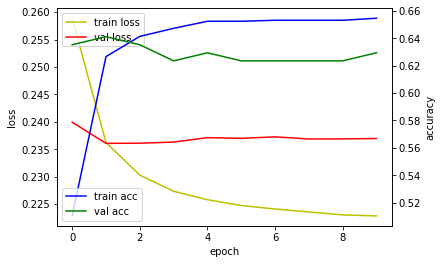

Accuracy: 0.7294117647058823


In [1777]:
# epochs, batch_size, learning rate를 정하기 위한 testing
keras.backend.clear_session()

inputs = Input(shape=(19,))

hidden1 = Dense(100, activation='swish')(inputs)
hidden2 = Dense(30, activation='swish')(hidden1)
hidden2 = Dense(30, activation='relu')(hidden1)
outputs = Dense(1, activation='sigmoid')(hidden2)

model1 = Model(inputs, outputs)
adam = keras.optimizers.Adam(learning_rate=0.00005)


model1.compile(loss='mse', optimizer= adam, metrics=['accuracy'])
hist = model1.fit(x_train, y_train, validation_data = (x_val, y_val),
                  epochs=10, batch_size=8, verbose=0)

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')
plt.show()

prediction = model1.predict(x_test)
right = 0
for i in range(len([0 if x<0.5 else 1 for x in prediction])):
    if [0 if x<0.5 else 1 for x in prediction][i] == y_test[i]:
        right += 1
print('Accuracy: {}'.format(right/len(y_test)))

In [1792]:
# Financial components만 가지고 각기다른 sample을 가지고 학습을 100번 반복하여 평균 정확도 및 std 계산
acc = []
for count in range(10):
    i = random.randint(1,1000)
    x_train, x_tmp, y_train, y_tmp = train_test_split(XXX,Y_bin, test_size=0.2, shuffle=True,  random_state=i)
    x_val, x_test, y_val, y_test = train_test_split(x_tmp,y_tmp, test_size=0.5, shuffle=True,  random_state=i)

    keras.backend.clear_session()

    inputs = Input(shape=(14,))

    hidden1 = Dense(100, activation='swish')(inputs)
    hidden2 = Dense(30, activation='swish')(hidden1)
    hidden2 = Dense(30, activation='relu')(hidden1)
    outputs = Dense(1, activation='sigmoid')(hidden2)

    model1 = Model(inputs, outputs)
    adam = keras.optimizers.Adam(learning_rate=0.00005)
    model1.compile(loss='mse', optimizer= adam, metrics=['accuracy'])
    hist = model1.fit(x_train, y_train, validation_data = (x_val, y_val),
                      epochs=10, batch_size=8, verbose=0)

    prediction = model1.predict(x_test)
    right = 0
    for i in range(len(y_test)):
        if [0 if x<0.5 else 1 for x in prediction][i] == y_test[i]:
            right += 1
    acc.append((right/len(y_test)))
    
print("Financial Data's performance: {}".format(np.array(acc).mean()))
print("Financial Data's standard deviation: {}".format(np.array(acc).std()))

Financial Data's performance: 0.6605882352941177
Financial Data's standard deviation: 0.025915753849306677


In [1793]:
# Financial components + G Rank만 가지고 각기다른 sample을 가지고 학습을 100번 반복하여 평균 정확도 및 std 계산
acc = []
for count in range(10):
    i = random.randint(1,1000)
    x_train, x_tmp, y_train, y_tmp = train_test_split(XX,Y_bin, test_size=0.2, shuffle=True,  random_state=i)
    x_val, x_test, y_val, y_test = train_test_split(x_tmp,y_tmp, test_size=0.5, shuffle=True,  random_state=i)

    keras.backend.clear_session()

    inputs = Input(shape=(18,))
    

    hidden1 = Dense(100, activation='swish')(inputs)
    hidden2 = Dense(30, activation='swish')(hidden1)
    hidden2 = Dense(30, activation='relu')(hidden1)
    outputs = Dense(1, activation='sigmoid')(hidden2)

    model1 = Model(inputs, outputs)
    adam = keras.optimizers.Adam(learning_rate=0.00005)
    model1.compile(loss='mse', optimizer= adam, metrics=['accuracy'])
    hist = model1.fit(x_train, y_train, validation_data = (x_val, y_val),
                      epochs=10, batch_size=8, verbose=0)

    prediction = model1.predict(x_test)
    right = 0
    for i in range(len(y_test)):
        if [0 if x<0.5 else 1 for x in prediction][i] == y_test[i]:
            right += 1
    acc.append((right/len(y_test)))
print("Financial+G Rank Data's performance: {}".format(np.array(acc).mean()))
print("Financial+G Rank Data's standard deviation: {}".format(np.array(acc).std()))

Financial+G Rank Data's performance: 0.6564705882352941
Financial+G Rank Data's standard deviation: 0.027740767347180215


In [1794]:
# Financial components + ESG Rank + etc 가지고 각기다른 sample을 가지고 학습을 100번 반복하여 평균 정확도 및 std 계산
acc = []
for count in range(10):
    i = random.randint(1,1000)
    x_train, x_tmp, y_train, y_tmp = train_test_split(X,Y_bin, test_size=0.2, shuffle=True,  random_state=i)
    x_val, x_test, y_val, y_test = train_test_split(x_tmp,y_tmp, test_size=0.5, shuffle=True,  random_state=i)

    keras.backend.clear_session()

    inputs = Input(shape=(19,))

    hidden1 = Dense(100, activation='swish')(inputs)
    hidden2 = Dense(30, activation='swish')(hidden1)
    hidden2 = Dense(30, activation='relu')(hidden1)
    outputs = Dense(1, activation='sigmoid')(hidden2)

    model1 = Model(inputs, outputs)
    adam = keras.optimizers.Adam(learning_rate=0.00005)
    model1.compile(loss='mse', optimizer= adam, metrics=['accuracy'])
    hist = model1.fit(x_train, y_train, validation_data = (x_val, y_val),
                      epochs=10, batch_size=8, verbose=0)

    prediction = model1.predict(x_test)
    right = 0
    for i in range(len(y_test)):
        if [0 if x<0.5 else 1 for x in prediction][i] == y_test[i]:
            right += 1
    acc.append((right/len(y_test)))
    
print("Overall Data's performance: {}".format(np.array(acc).mean()))
print("Overall Data's standard deviation: {}".format(np.array(acc).std()))

Overall Data's performance: 0.6535294117647058
Overall Data's standard deviation: 0.030953699098642047


In [1857]:
#Y를 0(y<0%), 1(0%<y<10%), 2(10%<y<30%), 3(30%<y) 바이너리로 제작, train/vaidation/test셋 구성
y_class = []
for item in Y:
    if item<=0 :
        y_class.append(0)
    elif 0<item<=0.3:
        y_class.append(1)
    elif 0.3<item<=0.6:
        y_class.append(2)
    elif 0.6<item:
        y_class.append(3)

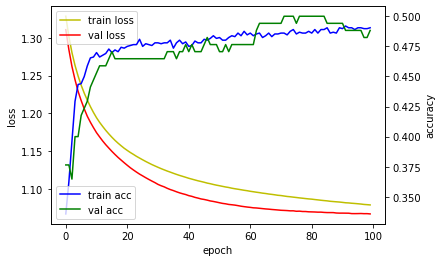

In [1885]:
# epochs, batch_size, learning rate를 정하기 위한 testing
acc = []

i = 1
x_train, x_tmp, y_train, y_tmp = train_test_split(np.array(X),np.array(y_class), test_size=0.2, shuffle=True,  random_state=i)
x_val, x_test, y_val, y_test = train_test_split(x_tmp,y_tmp, test_size=0.5, shuffle=True,  random_state=i)

keras.backend.clear_session()

inputs = Input(shape=(19,))

hidden1 = Dense(100, activation='swish')(inputs)
hidden2 = Dense(30, activation='swish')(hidden1)
hidden3 = Dense(30, activation='swish')(hidden2)
outputs = Dense(4, activation='softmax')(hidden3)


model1 = Model(inputs, outputs)
adam = keras.optimizers.Adam(learning_rate=0.00001)
model1.compile(loss='sparse_categorical_crossentropy', optimizer= adam, metrics=['accuracy'])
hist = model1.fit(x_train, y_train, validation_data = (x_val, y_val),
                  epochs=100, batch_size=4, verbose=0)


fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')
plt.show()

In [1907]:
# Financial components만 가지고 각기다른 sample을 가지고 학습을 100번 반복하여 평균 정확도 및 std 계산
acc = []
for count in range(100):
    i = random.randint(1,1000)
    x_train, x_tmp, y_train, y_tmp = train_test_split(XXX,y_class, test_size=0.2, shuffle=True,  random_state=i)
    x_val, x_test, y_val, y_test = train_test_split(x_tmp,y_tmp, test_size=0.5, shuffle=True,  random_state=i)

    keras.backend.clear_session()

    inputs = Input(shape=(14,))

    hidden1 = Dense(100, activation='swish')(inputs)
    hidden2 = Dense(30, activation='relu')(hidden1)
    outputs = Dense(4, activation='sigmoid')(hidden2)

    model1 = Model(inputs, outputs)
    adam = keras.optimizers.Adam(learning_rate=0.00005)
    model1.compile(loss='mse', optimizer= adam, metrics=['accuracy'])
    hist = model1.fit(x_train, y_train, validation_data = (x_val, y_val),
                      epochs=30, batch_size=8, verbose=0)

    prediction = model1.predict(x_test)
    right = 0
    for i in range(len(y_test)):
        if np.argmax(prediction[i]) == y_test[i]:
            right += 1
    acc.append((right/len(y_test)))
    
print("Financial Data's accuracy: {}".format(np.array(acc).mean()))
print("Financial Data's standard deviation: {}".format(np.array(acc).std()))

Financial Data's accuracy: 0.24511764705882352
Financial Data's standard deviation: 0.05677646936934739


In [1908]:
# Financial components+G Rank만 가지고 각기다른 sample을 가지고 학습을 100번 반복하여 평균 정확도 및 std 계산
acc = []
for count in range(100):
    i = random.randint(1,1000)
    x_train, x_tmp, y_train, y_tmp = train_test_split(XX,y_class, test_size=0.2, shuffle=True,  random_state=i)
    x_val, x_test, y_val, y_test = train_test_split(x_tmp,y_tmp, test_size=0.5, shuffle=True,  random_state=i)

    keras.backend.clear_session()

    inputs = Input(shape=(18,))
    

    hidden1 = Dense(100, activation='swish')(inputs)
    hidden2 = Dense(30, activation='relu')(hidden1)
    outputs = Dense(4, activation='sigmoid')(hidden2)

    model1 = Model(inputs, outputs)
    adam = keras.optimizers.Adam(learning_rate=0.00005)
    model1.compile(loss='mse', optimizer= adam, metrics=['accuracy'])
    hist = model1.fit(x_train, y_train, validation_data = (x_val, y_val),
                      epochs=30, batch_size=8, verbose=0)

    prediction = model1.predict(x_test)
    right = 0
    for i in range(len(y_test)):
        if np.argmax(prediction[i]) == y_test[i]:
            right += 1

    acc.append((right/len(y_test)))
    
print("Financial Data + G Rank's accuracy: {}".format(np.array(acc).mean()))
print("Financial Data + G Rank's standard deviation: {}".format(np.array(acc).std()))

Financial Data + G Rank's accuracy: 0.25264705882352945
Financial Data + G Rank's standard deviation: 0.05678451345972889


In [1909]:
# Financial components+G Rank만 가지고 각기다른 sample을 가지고 학습을 100번 반복하여 평균 정확도 및 std 계산
acc = []
for count in range(100):
    i = random.randint(1,1000)
    x_train, x_tmp, y_train, y_tmp = train_test_split(X,y_class, test_size=0.2, shuffle=True,  random_state=i)
    x_val, x_test, y_val, y_test = train_test_split(x_tmp,y_tmp, test_size=0.5, shuffle=True,  random_state=i)

    keras.backend.clear_session()

    inputs = Input(shape=(19,))    

    hidden1 = Dense(100, activation='swish')(inputs)
    hidden2 = Dense(30, activation='relu')(hidden1)
    outputs = Dense(4, activation='sigmoid')(hidden2)

    model1 = Model(inputs, outputs)
    adam = keras.optimizers.Adam(learning_rate=0.00005)
    model1.compile(loss='mse', optimizer= adam, metrics=['accuracy'])
    hist = model1.fit(x_train, y_train, validation_data = (x_val, y_val),
                      epochs=30, batch_size=8, verbose=0)

    prediction = model1.predict(x_test)
    right = 0
    for i in range(len(y_test)):
        if np.argmax(prediction[i]) == y_test[i]:
            right += 1

    acc.append((right/len(y_test)))
    
print("Overall Data's accuracy: {}".format(np.array(acc).mean()))
print("Overall Data's's standard deviation: {}".format(np.array(acc).std()))

Overall Data's accuracy: 0.24094117647058824
Overall Data's's standard deviation: 0.05073112514840893
